In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#get columns in measurement table
inspector = inspect(engine)
columns1 = inspector.get_columns('measurement')
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#inspect records of measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
#get columns in station table
columns2 = inspector.get_columns('station')
for c in columns2:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#inspect records of station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
 
#find most recent date: 
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23')

In [15]:
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
start_date

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
#note that func.avg ignores null values so that they are not factored into the average.  

last_year = session.query(measurement.date, func.avg(measurement.prcp)).\
    filter(measurement.date > start_date).\
    group_by(measurement.date).all() 
last_year

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [17]:
prcp_df = pd.DataFrame(last_year, columns = ['Date', 'Precip (in)'])
prcp_df.set_index('Date',inplace=True)
prcp_df['Precip (in)'] = prcp_df['Precip (in)'].round(2)

# #get values into lists. round precipitation daily averages 
# prcp = [round(row[1], 2) for row in last_year[:]]
# dates = [row[0] for row in last_year[:]]

# # Save the query results as a Pandas DataFrame and set the index to the date column
# prcp_df = pd.DataFrame(prcp, dates)
# prcp_df.index.name = "Date"
# prcp_df.columns = ["Precip (in)"]

# # Sort the dataframe by date (although it already looks to be sorted by date)
# prcp_df = prcp_df.sort_index(ascending=True)
# prcp_df.head(10)

prcp_df.head()

,Precip (in)
Date,
2016-08-24,1.55
2016-08-25,0.08
2016-08-26,0.02
2016-08-27,0.06
2016-08-28,0.52


In [18]:
prcp_dict = prcp_df.to_dict()
prcp_dict



{'Precip (in)': {'2016-08-24': 1.55,
  '2016-08-25': 0.08,
  '2016-08-26': 0.02,
  '2016-08-27': 0.06,
  '2016-08-28': 0.52,
  '2016-08-29': 0.24,
  '2016-08-30': 0.01,
  '2016-08-31': 0.64,
  '2016-09-01': 0.01,
  '2016-09-02': 0.05,
  '2016-09-03': 0.25,
  '2016-09-04': 0.28,
  '2016-09-05': 0.08,
  '2016-09-06': 0.25,
  '2016-09-07': 0.33,
  '2016-09-08': 0.08,
  '2016-09-09': 0.18,
  '2016-09-10': 0.28,
  '2016-09-11': 0.25,
  '2016-09-12': 0.31,
  '2016-09-13': 0.45,
  '2016-09-14': 2.38,
  '2016-09-15': 0.83,
  '2016-09-16': 0.12,
  '2016-09-17': 0.14,
  '2016-09-18': 0.11,
  '2016-09-19': 0.06,
  '2016-09-20': 0.15,
  '2016-09-21': 0.19,
  '2016-09-22': 0.21,
  '2016-09-23': 0.22,
  '2016-09-24': 0.05,
  '2016-09-25': 0.02,
  '2016-09-26': 0.28,
  '2016-09-27': 0.23,
  '2016-09-28': 0.02,
  '2016-09-29': 0.43,
  '2016-09-30': 0.19,
  '2016-10-01': 0.24,
  '2016-10-02': 0.12,
  '2016-10-03': 0.12,
  '2016-10-04': 0.58,
  '2016-10-05': 0.14,
  '2016-10-06': 0.02,
  '2016-10-07': 0

Text(0, 0.5, 'Precipitation (in) \n')

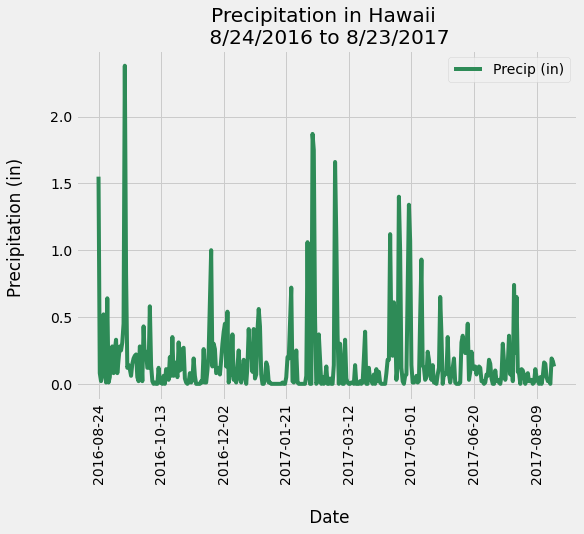

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

precip = prcp_df.plot(kind = "line", figsize = (8, 6), 
                     title = "Precipitation in Hawaii \n 8/24/2016 to 8/23/2017", 
                     legend = True, color = "seagreen", rot = 90)

# x_axis = np.arange(len(dates))
precip.set_xlabel("\n Date" )
precip.set_ylabel("Precipitation (in) \n")
                   

In [21]:
prcp_df.index.dtype

dtype('O')

In [22]:
#I am also plotting montly averages over time (using pandas), as an alterate way to visualize this data: 
#first, make copy of df 
prcp2_df = prcp_df.copy()

#convert index to datetime
prcp2_df.index = pd.to_datetime(prcp2_df.index)

#define column name for the index
prcp2_df["Date"] = prcp2_df.index
prcp2_df['Month-Year'] = pd.to_datetime(prcp2_df['Date']).dt.to_period('M')

mon_df = prcp2_df.groupby(prcp2_df["Month-Year"]).mean()
mon_df


,Precip (in)
Month-Year,
2016-08,0.390000
2016-09,0.281000
2016-10,0.120323
2016-11,0.131000
2016-12,0.199677
2017-01,0.075806
2017-02,0.226429
2017-03,0.157742
2017-04,0.315000


Text(0, 0.5, 'Average Monthly Precipitation (in) \n')

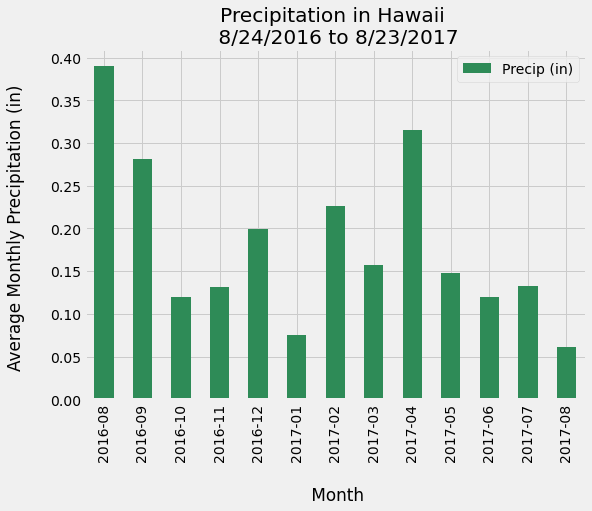

In [24]:
precip_mon = mon_df.plot(kind = "bar", figsize = (8, 6), 
                     title = "Precipitation in Hawaii \n 8/24/2016 to 8/23/2017", 
                     legend = True, color = "seagreen", rot = 90)

# x_axis = np.arange(len(dates))
precip_mon.set_xlabel("\n Month" )
precip_mon.set_ylabel("Average Monthly Precipitation (in) \n")

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df[["Precip (in)"]].describe()


,Precip (in)
count,365.000000
mean,0.170164
std,0.295888
min,0.000000
25%,0.010000
50%,0.070000
75%,0.190000
max,2.380000


In [26]:
# Design a query to show how many stations are available in this dataset?
# use distinct

sta_count = session.query(station).group_by(station.station).count()
print(f"There are {sta_count} stations in this dataset.")

There are 9 stations in this dataset.


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# station number USC00519281 

data = [measurement.station, 
        func.min(measurement.tobs),
        func.max(measurement.tobs),
        func.avg(measurement.tobs)]        

temp_stats = session.query(*data).filter(measurement.station == 'USC00519281').all()
print(f"The station ID, and minimum, maximum, and average temperature (deg F), were as follows: \n {temp_stats}.")


The station ID, and minimum, maximum, and average temperature (deg F), were as follows: 
 [('USC00519281', 54.0, 85.0, 71.66378066378067)].


In [29]:
## Query the last 12 months of temperature observation data for this station and plot the results as a 
## histogram (bins = 12)

## First get start and end dates
latest_date = session.query(measurement.date).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date.desc()).first()
latest_date

start_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)
start_date 

datetime.date(2016, 8, 18)

In [32]:
## Get temperatures after start date 

tobs = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date > start_date).statement

## Get results into df to be read for plotting  
# tobs_df = pd.DataFrame(tobs)

tobs_df = pd.read_sql_query(tobs, session.bind)
tobs_df


,tobs
0,79.0
1,81.0
2,79.0
3,78.0
4,77.0
...,...
351,77.0
352,77.0
353,76.0
354,76.0


In [33]:
## Creat list for plotting 
tobs_list = tobs_df['tobs']

Text(0, 0.5, 'Frequency \n')

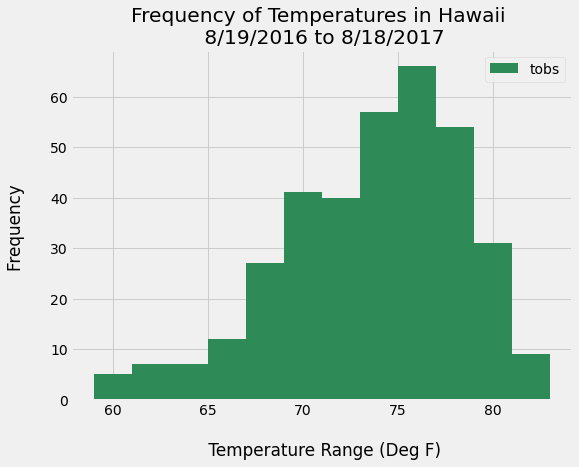

In [34]:
hist = tobs_list.plot.hist(figsize = (8, 6), bins =12,
                     title = "Frequency of Temperatures in Hawaii \n 8/19/2016 to 8/18/2017", 
                     legend = True, color = "seagreen")

hist.set_xlabel("\n Temperature Range (Deg F)" )
hist.set_ylabel("Frequency \n")

# Step 2 - Climate App
#### Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

    Use Flask to create your routes.


In [51]:
from flask import Flask, jsonify
#Get Station List
    #Get Station List
sta_list = session.query(station.station).order_by(station.station).all()
    #Return a JSON list of stations from the dataset.
stations2 = list(np.ravel(sta_list))
print(jsonify(stations2))

RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
to interface with the current application object in some way. To solve
this, set up an application context with app.app_context().  See the
documentation for more information.

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
